In [1]:
import numpy as np
from binary_io import *
import matplotlib.pyplot as plt


In [4]:
tmp = fvecs_read('/data/disk1/liuchengjun/HNNS/sample/datacomp-text.base.M_32.efc_1000.efs_1000.ck_ts_1000.ncheck_100.recall@1000.train_feats_nn.fvecs')
print(tmp.shape)
tmp = fvecs_read('/data/disk1/liuchengjun/HNNS/sample/datacomp-text.base.M_32.efc_1000.efs_1000.ck_ts_1000.ncheck_100.recall@1000.train_label.ivecs')
print(tmp.shape)


(500000, 881)
(500000, 2)


In [3]:
learn = fvecs_read('/home/zhengweiguo/liuchengjun/anns/dataset/imagenet/learn.norm.fvecs')
print(np.linalg.norm(learn[0]))

0.99999994


(500000,)


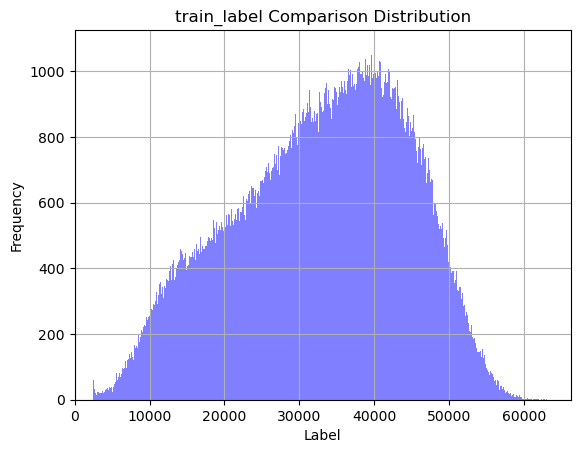

0.0 2438.0404459554047
0.2 28160.213228677134
0.4 35378.23192680732
0.6000000000000001 40717.25502449755
0.8 45849.52779722028


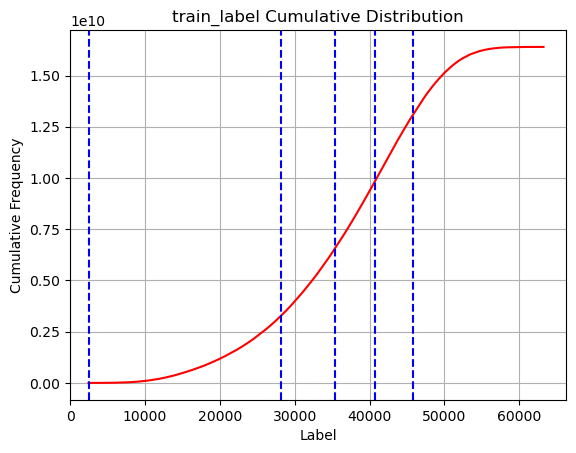

34637.70995907231


In [43]:
prefix = '../data/gist1m.M_128.efc_1000.efs_1000.ck_ts_2000.ncheck_100.recall@10'
train_label = ivecs_read(f'{prefix}.train_label.ivecs')[:, 1].flatten()
print(train_label.shape)

plt.hist(train_label, bins = 1001, color='blue', alpha=0.5)
plt.title(f'train_label Comparison Distribution')
plt.xlim(0)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

hist, bins = np.histogram(train_label, bins = 10001)
bin_centers = (bins[: - 1]+bins[1:])/2
new_y = hist * bin_centers
cum_hist = np.cumsum(new_y)
plt.plot(bin_centers, cum_hist, color='red')
plt.title(f'train_label Cumulative Distribution')
plt.xlim(0)
plt.xlabel('Label')
plt.ylabel('Cumulative Frequency')
plt.grid(True)

max_cum = cum_hist[-1]
for p in np.arange(0.0, 1, 0.2):
    target_cum = p * max_cum
    idx = np.argmin(np.abs(cum_hist - target_cum))
    x_value = bin_centers[idx]
    print(p, x_value)
    plt.axvline(x = x_value, color='blue', linestyle='--')
    # plt.text(f'{x_value}.2f', -0.05 * max_cum, str(p), ha='center', va='top')
plt.show()

fail_comparison = train_label[ivecs_read(f'{prefix}.train_label.ivecs')[:, 0].flatten() == 1]
# for c in fail_comparison:
#     print(c)
# print(np.sum((fail_comparison > 35378.23192680732)))
print(np.mean(fail_comparison))

(1000,)


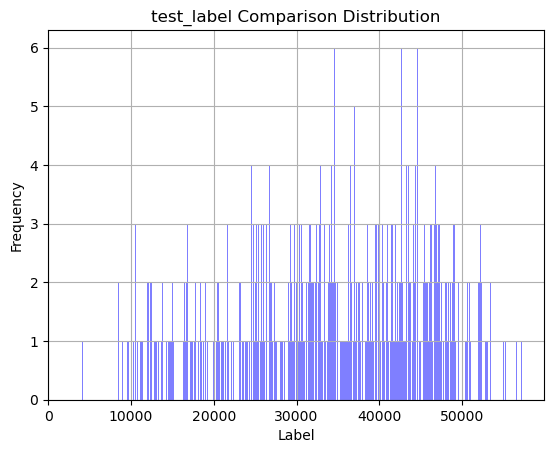

0.0 3118.9801980198017
0.2 29479.0396039604
0.4 36472.52475247525
0.6000000000000001 41852.12871287129
0.8 46693.77227722773


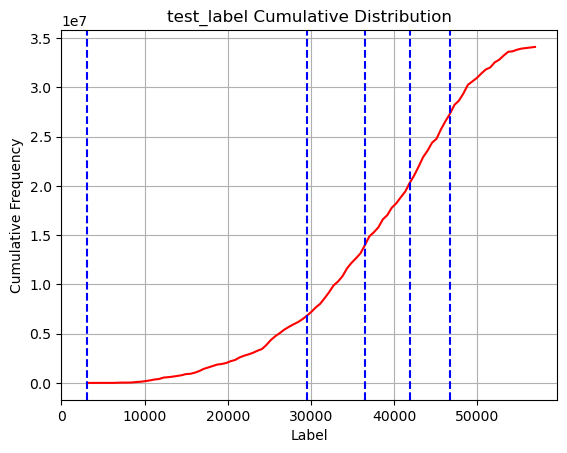

39541.0


In [44]:
test_label = ivecs_read(f'{prefix}.test_label.ivecs')[:, 1].flatten()
print(test_label.shape)

plt.hist(test_label, bins = 1001, color='blue', alpha=0.5)
plt.title(f'test_label Comparison Distribution')
plt.xlim(0)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

hist, bins = np.histogram(test_label, bins = 101)
bin_centers = (bins[: - 1]+bins[1:])/2
new_y = hist * bin_centers
cum_hist = np.cumsum(new_y)
plt.plot(bin_centers, cum_hist, color='red')
plt.title(f'test_label Cumulative Distribution')
plt.xlim(0)
plt.xlabel('Label')
plt.ylabel('Cumulative Frequency')
plt.grid(True)

max_cum = cum_hist[-1]
for p in np.arange(0.0, 1, 0.2):
    target_cum = p * max_cum
    idx = np.argmin(np.abs(cum_hist - target_cum))
    x_value = bin_centers[idx]
    print(p, x_value)
    plt.axvline(x = x_value, color='blue', linestyle='--')
    # plt.text(f'{x_value}.2f', -0.05 * max_cum, str(p), ha='center', va='top')
plt.show()

fail_comparison = test_label[ivecs_read(f'{prefix}.test_label.ivecs')[:, 0].flatten() == 1]
# for c in fail_comparison:
#     print(c)
# print(np.sum((fail_comparison > 35378.23192680732)))
print(np.mean(fail_comparison))

In [27]:
from tqdm import tqdm

train_gt = ivecs_read('/home/zhengweiguo/liuchengjun/anns/dataset/imagenet/learn.norm.gt.ivecs.cpu')
print(train_gt.shape)

test_gt = ivecs_read('/home/zhengweiguo/liuchengjun/anns/query/imagenet/query.norm.gt.ivecs.cpu')
print(test_gt.shape)

train_gt_flatten = train_gt.flatten().reshape(-1, 1)
test_gt_flatten = test_gt.flatten().reshape(-1, 1)

# ivecs_write('/home/zhengweiguo/liuchengjun/anns/dataset/imagenet/learn.norm.gt.ivecs.cpu', train_gt_flatten)
# ivecs_write('/home/zhengweiguo/liuchengjun/anns/query/imagenet/query.norm.gt.ivecs.cpu', test_gt_flatten)

(50000000, 1)
(1000000, 1)


In [6]:
train_feats_lgb = fvecs_read(f'{prefix}.train_feats_lgb.fvecs')
train_feats_bert = fvecs_read(f'{prefix}.train_feats_bert.fvecs')
train_label = ivecs_read(f'{prefix}.train_label.ivecs')
print(train_feats_lgb.shape)
print(train_label.shape)
print()
for i in range(10000):
    print(train_feats_lgb[i][-5:])
    print(train_label[i])

(500000, 773)
(500000, 1)

[0.499058   0.5111182  0.49901998 1.0241659  0.9999238 ]
[0]
[0.80741465 0.88871175 0.8587881  1.1006881  1.063627  ]
[0]
[0.8523582  0.88840485 0.8693551  1.0422904  1.019941  ]
[0]
[0.8707757  0.91331273 0.87395906 1.0488496  1.0036558 ]
[0]
[0.6026402  0.7180581  0.69229436 1.1915203  1.1487689 ]
[0]
[0.8238886  0.8535051  0.81789887 1.0359472  0.9927299 ]
[0]
[0.90388656 0.9173607  0.89026713 1.0149069  0.98493236]
[0]
[0.7758    0.8292917 0.7994015 1.0689504 1.0304222]
[0]
[0.8313639 0.8887095 0.8698855 1.0689777 1.0463355]
[0]
[0.55331385 0.57649577 0.5614261  1.0418965  1.0146612 ]
[0]
[0.83825254 0.9053824  0.87205523 1.080083   1.0403252 ]
[0]
[0.8475492 0.8972889 0.8828057 1.0586865 1.0415982]
[0]
[0.5009936  0.53336954 0.50912786 1.0646235  1.0162362 ]
[0]
[0.77058864 0.8827634  0.8634966  1.1455702  1.1205676 ]
[0]
[0.7614746  0.76808864 0.7502608  1.0086858  0.98527354]
[0]
[0.8262663 1.000313  0.8664633 1.2106425 1.048649 ]
[0]
[0.69832176 0.799

In [21]:
IP_cluster_info = ivecs_read('/home/zhengweiguo/liuchengjun/anns/dataset/imagenet/kc8192.IP.labels.ivecs')
L2_cluster_info = ivecs_read('/home/zhengweiguo/liuchengjun/anns/dataset/imagenet/kc8192.L2.labels.ivecs')
print(IP_cluster_info[:20])
print(L2_cluster_info[:20])
cluster_size = [0] * 8192


for label in cluster_info:
    cluster_size[label[0]] += 1

print(min(cluster_size))
print(max(cluster_size))
print(cluster_size[4729])

[[3717]
 [5044]
 [7861]
 [3717]
 [3374]
 [5044]
 [7861]
 [3717]
 [7861]
 [2246]
 [3717]
 [7861]
 [5044]
 [5044]
 [3717]
 [5044]
 [ 873]
 [5044]
 [5044]
 [7861]]
[[3717]
 [5044]
 [7861]
 [3717]
 [3374]
 [5044]
 [7861]
 [3717]
 [7861]
 [2246]
 [3717]
 [7861]
 [5044]
 [5044]
 [3717]
 [7562]
 [ 873]
 [5044]
 [5044]
 [7861]]
1
4708
1544


In [2]:
i_base = fvecs_read('/home/zhengweiguo/liuchengjun/anns/dataset/datacomp-image/base.i.norm.fvecs')
print(i_base[0])

[ 4.37927246e-03  1.93634033e-02  1.77917480e-02  6.40869141e-02
  2.31933594e-02 -5.79071045e-03 -3.34777832e-02  1.16806030e-02
  2.23083496e-02 -1.32751465e-02  6.42395020e-03 -4.91638184e-02
 -3.70178223e-02  3.72314453e-02  2.17590332e-02 -2.43835449e-02
  1.14440918e-02  3.40881348e-02  4.92095947e-03  2.56958008e-02
  1.44500732e-02 -1.39694214e-02 -4.84924316e-02  9.46807861e-03
 -3.56140137e-02 -2.33917236e-02 -5.33676147e-03 -8.81958008e-03
  3.50341797e-02 -2.77252197e-02  1.15680695e-03  6.44531250e-02
  1.70135498e-02 -6.04248047e-02  1.07269287e-02 -1.43814087e-02
 -1.72576904e-02  3.05480957e-02  2.43530273e-02 -2.97851562e-02
  2.62451172e-02 -5.89599609e-02 -3.01055908e-02  3.01742554e-03
 -1.55334473e-02 -3.43322754e-02 -3.34358215e-03  2.67028809e-03
 -8.89587402e-03 -2.71301270e-02  1.28326416e-02 -3.03955078e-02
 -2.25067139e-02 -2.95410156e-02  1.27105713e-02  3.97338867e-02
  1.93023682e-02  7.36618042e-03 -1.87835693e-02  3.75671387e-02
 -3.89862061e-03  1.05895

In [6]:
i_learn = fvecs_read('/home/zhengweiguo/liuchengjun/anns/dataset/datacomp-image/learn.i.norm.fvecs')
print(i_learn[0, :10])
t_learn = fvecs_read('/home/zhengweiguo/liuchengjun/anns/dataset/datacomp-text/learn.t.norm.fvecs')
print(t_learn[0, :10])

[-0.01808167 -0.0049057  -0.03179932 -0.07763672 -0.01948547 -0.00906372
  0.02134705 -0.0045166  -0.03295898 -0.02020264]
[ 0.01386261  0.03372192 -0.00399017 -0.01397705  0.02122498  0.02029419
 -0.01779175 -0.02926636  0.01966858 -0.01304626]
